# KNN Algorithm_Final Version

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('result.csv') # 최종 데이터

In [3]:
df

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,2015,0.831225,0.261880,-1.138088,-0.358384,-0.101739,-0.987357,0.250083,-3.400606,0.942863,...,-0.317913,-0.490445,0.359679,2.729099,2.685552,-0.750781,-0.627591,-0.450545,0.450545,65.0
1,2014,0.896482,0.278185,-1.138088,-0.357303,-0.163251,-1.012464,0.268074,-1.106887,0.951267,...,-0.317913,-0.488408,-0.221725,2.795474,2.728889,-0.765329,-0.658569,-0.450545,0.450545,59.9
2,2013,0.872011,0.294490,-1.138088,-0.357450,-0.169012,-1.037571,0.286064,-0.930447,0.930256,...,-0.317913,-0.487043,0.324790,2.839724,2.772227,-0.794425,-0.689547,-0.450545,0.450545,59.9
3,2012,0.904639,0.318948,-1.138088,-0.355058,0.049996,-1.062678,0.310052,-0.709897,1.094147,...,-0.317913,-0.484305,-0.163089,2.883973,2.837233,-0.828370,-0.720525,-0.450545,0.450545,59.5
4,2011,0.929110,0.335253,-1.138088,-0.389302,0.070995,-1.082763,0.334040,-0.665787,0.820995,...,-0.317913,-0.527749,-0.175590,2.950348,2.880570,-0.872014,-0.813460,-0.450545,0.450545,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2004,4.583464,-0.023460,-0.040434,-0.392721,-0.206086,-0.585649,0.004210,-0.709897,0.510023,...,6.028106,-0.499750,-0.005063,1.003360,0.973722,-1.099932,-0.906394,-0.450545,0.450545,44.3
2651,2003,4.518208,-0.031612,-0.116134,-0.392721,-0.116235,-0.605734,-0.001787,-3.356496,0.253680,...,6.615350,-0.499823,-0.007562,1.091860,1.082065,-1.046589,-0.813460,-0.450545,0.450545,44.5
2652,2002,-0.718612,-0.039765,-0.022770,-0.392721,-0.180720,-0.625820,-0.007784,-0.445237,0.257883,...,7.202593,-0.528192,-0.225241,-0.810878,-0.781445,-1.002945,-0.658569,-0.450545,0.450545,44.8
2653,2001,4.281654,-0.039765,-0.706596,-0.392721,-0.159813,-0.645905,-0.013780,-0.312907,0.102396,...,7.638290,-0.493000,-0.012221,-0.722379,-0.694771,-1.002945,-0.720525,-0.450545,0.450545,45.3


In [4]:
original_cols = list(df.columns)
new_cols = []

# 컬럼 공백 제거
for col in original_cols:
    new_cols.append(col.strip().replace('  ', ' '))
df.columns = new_cols

In [5]:
df

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,2015,0.831225,0.261880,-1.138088,-0.358384,-0.101739,-0.987357,0.250083,-3.400606,0.942863,...,-0.317913,-0.490445,0.359679,2.729099,2.685552,-0.750781,-0.627591,-0.450545,0.450545,65.0
1,2014,0.896482,0.278185,-1.138088,-0.357303,-0.163251,-1.012464,0.268074,-1.106887,0.951267,...,-0.317913,-0.488408,-0.221725,2.795474,2.728889,-0.765329,-0.658569,-0.450545,0.450545,59.9
2,2013,0.872011,0.294490,-1.138088,-0.357450,-0.169012,-1.037571,0.286064,-0.930447,0.930256,...,-0.317913,-0.487043,0.324790,2.839724,2.772227,-0.794425,-0.689547,-0.450545,0.450545,59.9
3,2012,0.904639,0.318948,-1.138088,-0.355058,0.049996,-1.062678,0.310052,-0.709897,1.094147,...,-0.317913,-0.484305,-0.163089,2.883973,2.837233,-0.828370,-0.720525,-0.450545,0.450545,59.5
4,2011,0.929110,0.335253,-1.138088,-0.389302,0.070995,-1.082763,0.334040,-0.665787,0.820995,...,-0.317913,-0.527749,-0.175590,2.950348,2.880570,-0.872014,-0.813460,-0.450545,0.450545,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2004,4.583464,-0.023460,-0.040434,-0.392721,-0.206086,-0.585649,0.004210,-0.709897,0.510023,...,6.028106,-0.499750,-0.005063,1.003360,0.973722,-1.099932,-0.906394,-0.450545,0.450545,44.3
2651,2003,4.518208,-0.031612,-0.116134,-0.392721,-0.116235,-0.605734,-0.001787,-3.356496,0.253680,...,6.615350,-0.499823,-0.007562,1.091860,1.082065,-1.046589,-0.813460,-0.450545,0.450545,44.5
2652,2002,-0.718612,-0.039765,-0.022770,-0.392721,-0.180720,-0.625820,-0.007784,-0.445237,0.257883,...,7.202593,-0.528192,-0.225241,-0.810878,-0.781445,-1.002945,-0.658569,-0.450545,0.450545,44.8
2653,2001,4.281654,-0.039765,-0.706596,-0.392721,-0.159813,-0.645905,-0.013780,-0.312907,0.102396,...,7.638290,-0.493000,-0.012221,-0.722379,-0.694771,-1.002945,-0.720525,-0.450545,0.450545,45.3


## 데이터 분할 (훈련:검증:테스트 = 7:2:1)

In [6]:
features=list(df.drop(columns='Life expectancy'))
features # 독립변수 X에 해당하는 컬럼 리스트

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 10-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developed',
 'Status_Developing']

In [7]:
from sklearn.model_selection import train_test_split

X = df[features].values # 독립변수, 위에서 선언한 features list 사용
y = df['Life expectancy'].values # 종속변수

# 데이터 -> 훈련, 검증, 테스트 세트로 분할 (7:2:1 비율)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

## 1. 변수 선택 전

In [8]:
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 성능 평가 척도
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### ↓ Z-score 정규화 후, 8-fold 교차 검증 후 성능평가    
: 정규분포로 변환하는 과정, 동일한 스케일을 가지도록 한다.

In [11]:
# 다양한 K값
k_values = [3, 5, 7, 9, 11, 13, 15]

# 결과를 저장할 리스트
results = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k) # KNN 회귀
    
    # 교차 검증을 통한 성능 평가 (8-fold)
    mse_scores = -cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='r2')
    
    # 수정결정계수: Adjusted R-squared 계산
    n = len(X_train)
    p = X_train.shape[1]
    adjusted_r2_scores = 1 - (1 - r2_scores) * (n - 1) / (n - p - 1)
    
    # 결과 저장
    results.append({
        'k': k,
        'MSE': np.mean(mse_scores),
        'MAE': np.mean(mae_scores),
        'R-squared': np.mean(r2_scores),
        'Adjusted R-squared': np.mean(adjusted_r2_scores)
    })

# 결과 출력
for result in results:
    print(f'k={result["k"]}, MSE: {result["MSE"]:.4f}, MAE: {result["MAE"]:.4f}, '
          f'R-squared: {result["R-squared"]:.4f}, Adjusted R-squared: {result["Adjusted R-squared"]:.4f}')
    
# 최적의 K 값 선택: MSE 값이 가장 작은 K 출력
best_k = min(results, key=lambda x: x['MSE'])['k']
print(f'=> Best K: {best_k}')

k=3, MSE: 10.9835, MAE: 2.3463, R-squared: 0.8694, Adjusted R-squared: 0.8679
k=5, MSE: 11.6807, MAE: 2.4540, R-squared: 0.8614, Adjusted R-squared: 0.8599
k=7, MSE: 11.9746, MAE: 2.5166, R-squared: 0.8582, Adjusted R-squared: 0.8566
k=9, MSE: 12.4332, MAE: 2.5836, R-squared: 0.8527, Adjusted R-squared: 0.8511
k=11, MSE: 12.7385, MAE: 2.6390, R-squared: 0.8489, Adjusted R-squared: 0.8473
k=13, MSE: 13.0470, MAE: 2.6767, R-squared: 0.8451, Adjusted R-squared: 0.8434
k=15, MSE: 13.4763, MAE: 2.7359, R-squared: 0.8400, Adjusted R-squared: 0.8382
=> Best K: 3


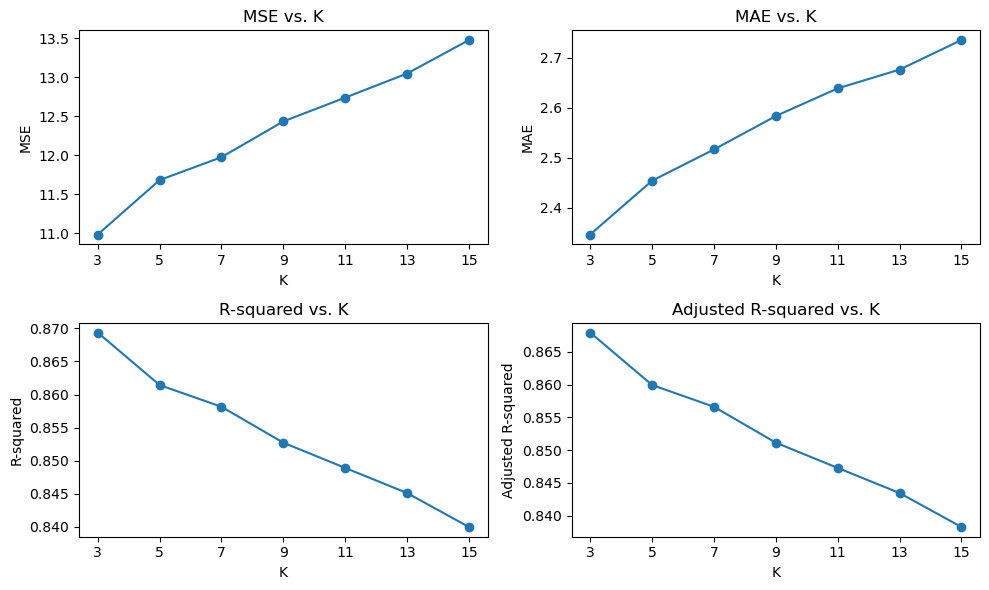

In [12]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# MSE 그래프
plt.subplot(2, 2, 1)
plt.plot([result["k"] for result in results], [result["MSE"] for result in results], marker='o')
plt.title('MSE vs. K')
plt.xlabel('K')
plt.ylabel('MSE')

# x축의 눈금을 k 값으로 설정
plt.xticks([result["k"] for result in results])

# MAE 그래프
plt.subplot(2, 2, 2)
plt.plot([result["k"] for result in results], [result["MAE"] for result in results], marker='o')
plt.title('MAE vs. K')
plt.xlabel('K')
plt.ylabel('MAE')
plt.xticks([result["k"] for result in results])

# R-squared 그래프
plt.subplot(2, 2, 3)
plt.plot([result["k"] for result in results], [result["R-squared"] for result in results], marker='o')
plt.title('R-squared vs. K')
plt.xlabel('K')
plt.ylabel('R-squared')
plt.xticks([result["k"] for result in results])

# Adjusted R-squared 그래프
plt.subplot(2, 2, 4)
plt.plot([result["k"] for result in results], [result["Adjusted R-squared"] for result in results], marker='o')
plt.title('Adjusted R-squared vs. K')
plt.xlabel('K')
plt.ylabel('Adjusted R-squared')
plt.xticks([result["k"] for result in results])

plt.tight_layout()
plt.show()

## 1-2. 변수 선택 전 최적의 K 값으로 KNN 모델 만들기 (최적화)

In [15]:
# 최적의 K에 대한 KNN 회귀 모델 생성
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train, y_train)

# 예측값 계산
y_pred = best_knn_regressor.predict(X_test)

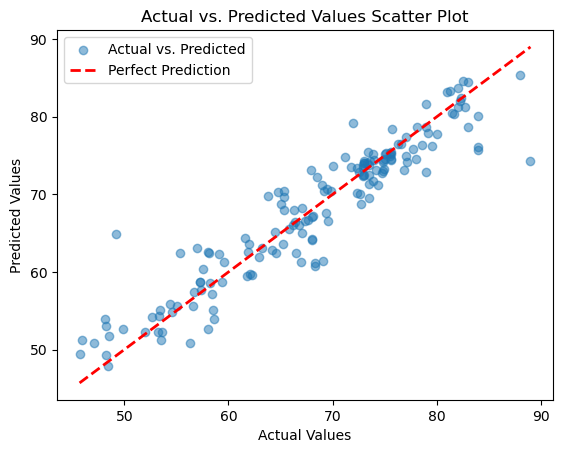

In [20]:
# 산점도 그래프 그리기
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# 그래프에 레이블과 제목 추가
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

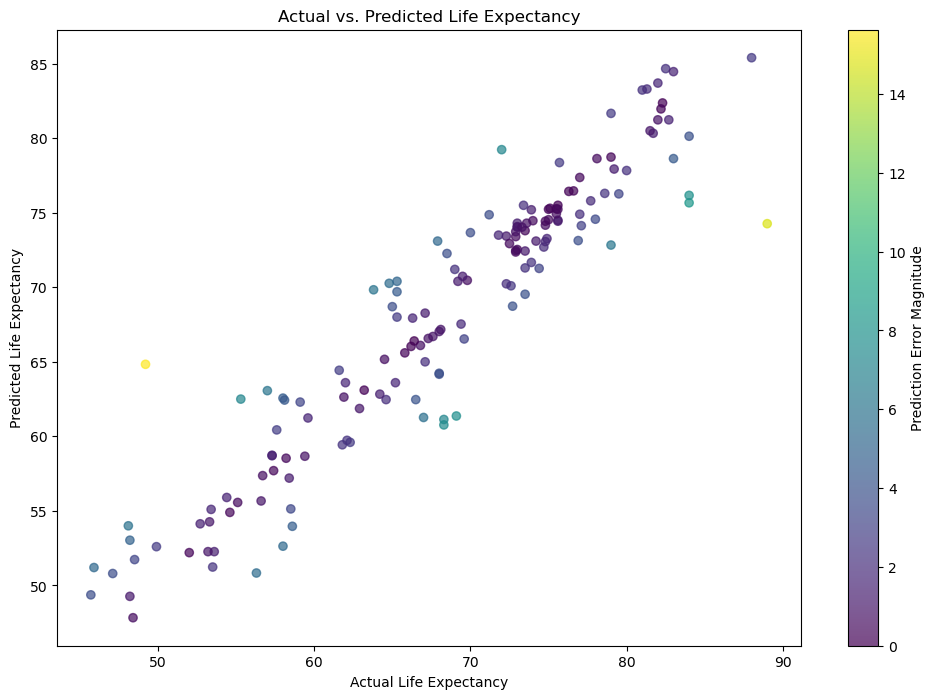

In [21]:
# 예측 오차 계산
error = np.abs(y_test - y_test_pred)

# 산점도 시각화
plt.figure(figsize=(12, 8)) # 그림의 크기 조절
plt.scatter(y_test, y_test_pred, c=error, cmap='viridis', alpha=0.7)

# 그래프에 레이블 및 제목 추가
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

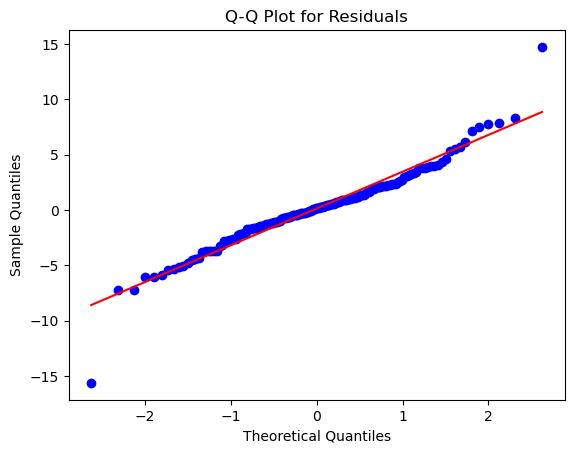

In [22]:
# Q-Q plot: 잔차의 정규성 확인
residuals = y_test - y_test_pred

stats.probplot(residuals, dist="norm", plot=plt)

# 그래프에 레이블 및 제목 추가
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

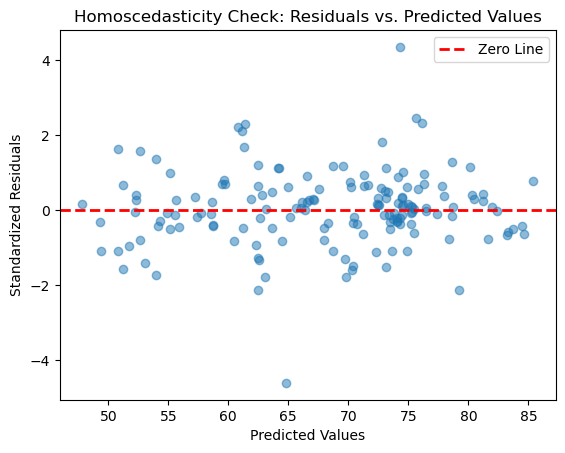

In [23]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_test_pred
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_test_pred, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

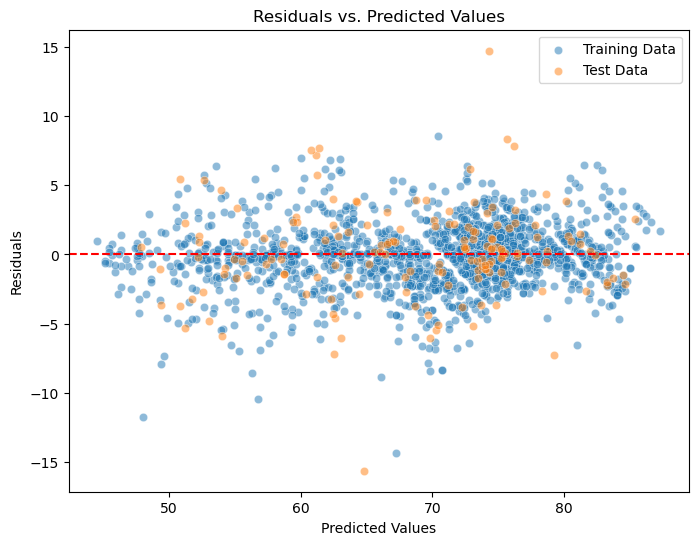

In [24]:
# 훈련 데이터에 대한 예측값 얻기
y_pred_train = best_knn_regressor.predict(X_train)

# 잔차 계산
residuals_train = y_train - y_pred_train

# 테스트 데이터에 대한 예측값 얻기
y_pred_test = best_knn_regressor.predict(X_test)

# 잔차 계산
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=residuals_train, alpha=0.5, label='Training Data')
sns.scatterplot(x=y_pred_test, y=residuals_test, alpha=0.5, label='Test Data')

# 그래프에 레이블 및 제목 추가
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # 잔차가 0인 수평선 추가
plt.legend()
plt.show()

### 2. 변수 선택(스텝와이즈) 후 :  'Schooling', 'HIV/AIDS', 'Adult Mortality'

In [25]:
features=df[['Schooling', 'HIV/AIDS', 'Adult Mortality']] # Stepwise 변수선택법을 통해 도출된 df의 컬럼 3개

In [26]:
from sklearn.model_selection import train_test_split

X = features # 변수선택법으로 도출된 컬럼들, 독립변수
y = df['Life expectancy'] # 독립변수

# 데이터 -> 훈련, 검증, 테스트 세트로 분할 (7:2:1 비율)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [27]:
# 다양한 K값
k_values = [3, 5, 7, 9, 11, 13, 15]

# 결과를 저장할 리스트
results = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k) # KNN 회귀
    
    # 교차 검증을 통한 성능 평가 (8-fold)
    mse_scores = -cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(knn_regressor, X_train, y_train, cv=8, scoring='r2')
    
    # 수정결정계수: Adjusted R-squared 계산
    n = len(X_train)
    p = X_train.shape[1]
    adjusted_r2_scores = 1 - (1 - r2_scores) * (n - 1) / (n - p - 1)
    
    # 결과 저장
    results.append({
        'k': k,
        'MSE': np.mean(mse_scores),
        'MAE': np.mean(mae_scores),
        'R-squared': np.mean(r2_scores),
        'Adjusted R-squared': np.mean(adjusted_r2_scores)
    })

# 결과 출력
for result in results:
    print(f'k={result["k"]}, MSE: {result["MSE"]:.4f}, MAE: {result["MAE"]:.4f}, '
          f'R-squared: {result["R-squared"]:.4f}, Adjusted R-squared: {result["Adjusted R-squared"]:.4f}')
    
# 최적의 K 값 선택: MSE 값이 가장 작은 K 출력
best_k = min(results, key=lambda x: x['MSE'])['k']
print(f'=> Best K: {best_k}')

k=3, MSE: 6.5385, MAE: 1.7459, R-squared: 0.9223, Adjusted R-squared: 0.9222
k=5, MSE: 6.5067, MAE: 1.7838, R-squared: 0.9226, Adjusted R-squared: 0.9225
k=7, MSE: 6.7836, MAE: 1.8232, R-squared: 0.9194, Adjusted R-squared: 0.9193
k=9, MSE: 6.9305, MAE: 1.8393, R-squared: 0.9178, Adjusted R-squared: 0.9177
k=11, MSE: 7.1988, MAE: 1.8844, R-squared: 0.9147, Adjusted R-squared: 0.9145
k=13, MSE: 7.3648, MAE: 1.9143, R-squared: 0.9127, Adjusted R-squared: 0.9125
k=15, MSE: 7.5853, MAE: 1.9402, R-squared: 0.9101, Adjusted R-squared: 0.9099
=> Best K: 5


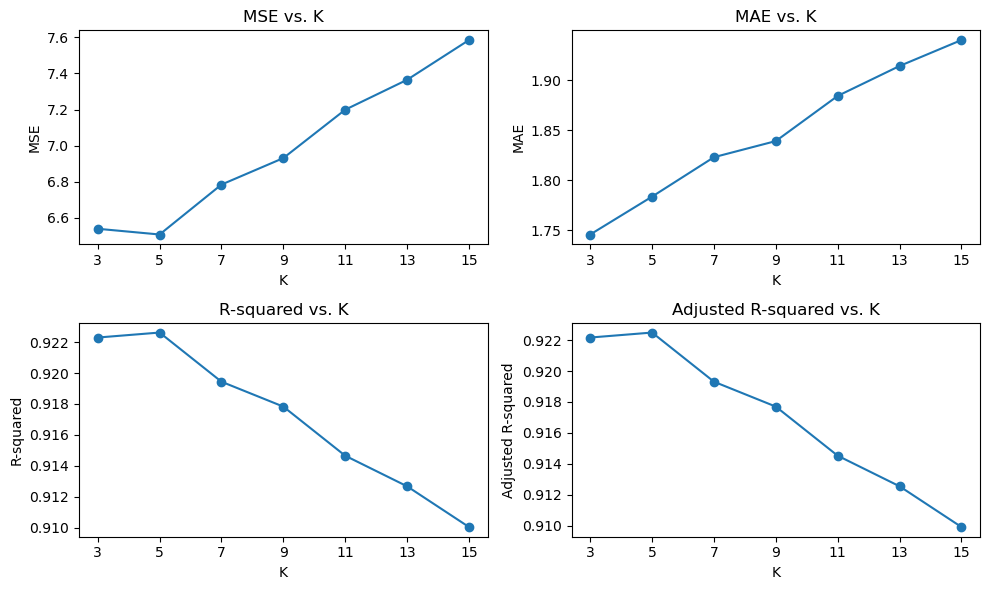

In [28]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# MSE 그래프
plt.subplot(2, 2, 1)
plt.plot([result["k"] for result in results], [result["MSE"] for result in results], marker='o')
plt.title('MSE vs. K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks([result["k"] for result in results])

# MAE 그래프
plt.subplot(2, 2, 2)
plt.plot([result["k"] for result in results], [result["MAE"] for result in results], marker='o')
plt.title('MAE vs. K')
plt.xlabel('K')
plt.ylabel('MAE')
plt.xticks([result["k"] for result in results])

# R-squared 그래프
plt.subplot(2, 2, 3)
plt.plot([result["k"] for result in results], [result["R-squared"] for result in results], marker='o')
plt.title('R-squared vs. K')
plt.xlabel('K')
plt.ylabel('R-squared')
plt.xticks([result["k"] for result in results])

# Adjusted R-squared 그래프
plt.subplot(2, 2, 4)
plt.plot([result["k"] for result in results], [result["Adjusted R-squared"] for result in results], marker='o')
plt.title('Adjusted R-squared vs. K')
plt.xlabel('K')
plt.ylabel('Adjusted R-squared')
plt.xticks([result["k"] for result in results])

plt.tight_layout()
plt.show()

## 1-2. 변수 선택 후 최적의 K 값으로 KNN 모델 만들기 (최적화)

In [29]:
# => 최적의 K=5 반영하여 알고리즘 실행
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train, y_train)

# 예측값 계산
y_pred = best_knn_regressor.predict(X_test)

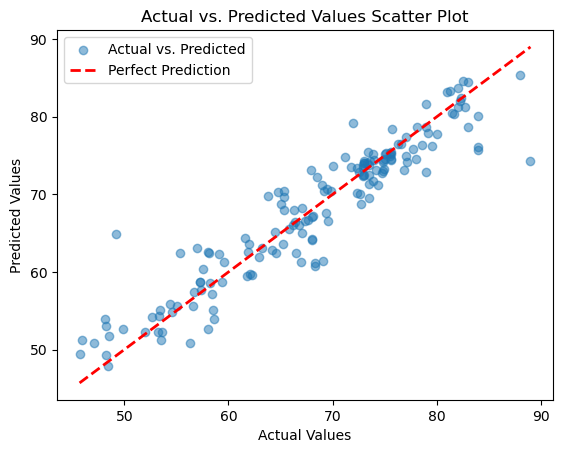

In [30]:
# 산점도 그래프 그리기
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# 그래프에 레이블과 제목 추가
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

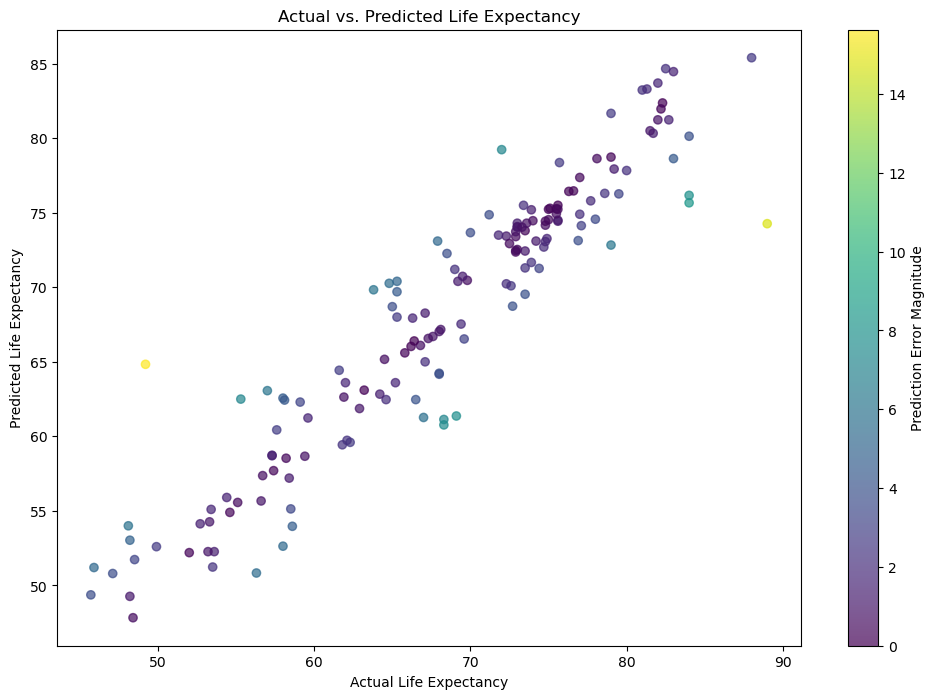

In [32]:
# 예측 오차 계산
error = np.abs(y_test - y_test_pred)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=error, cmap='viridis', alpha=0.7)

# 그래프에 레이블 및 제목 추가
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.show()

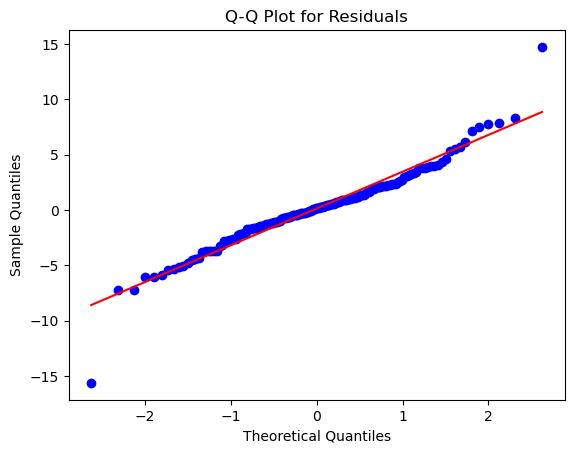

In [33]:
# Q-Q plot 시각화 -> 잔차의 정규성 확인

# 잔차 계산
residuals = y_test - y_test_pred

stats.probplot(residuals, dist="norm", plot=plt)

# 그래프에 레이블 및 제목 추가
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

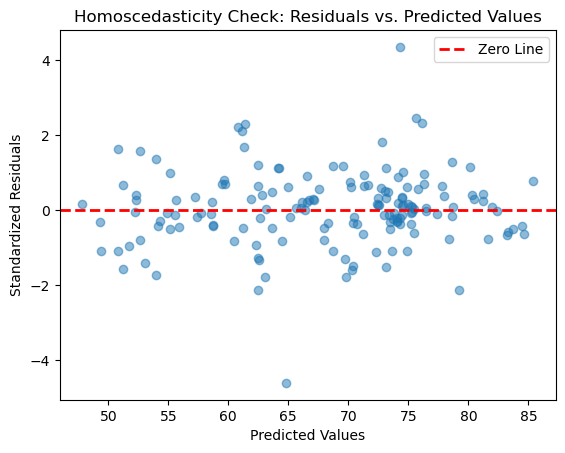

In [34]:
# 잔차의 등분산성 시각화

# 잔차 계산
residuals = y_test - y_test_pred

# 표준화된 잔차 계산
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

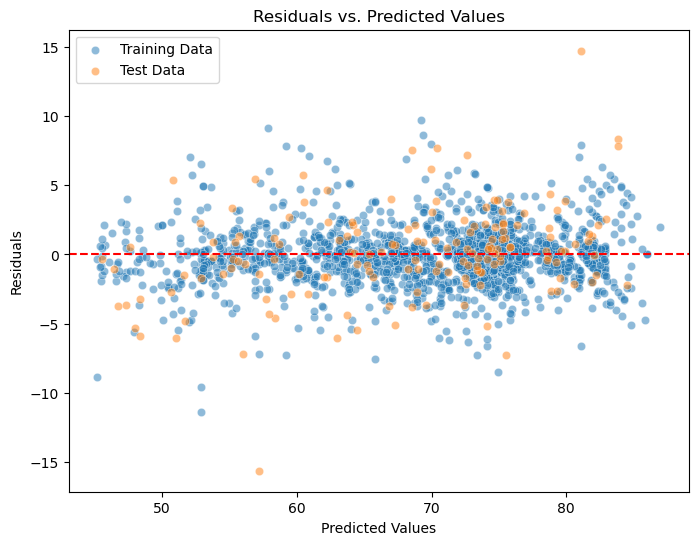

In [35]:
# 예측값과 실제값 차이 그래프 시각화

# 훈련 데이터에 대한 예측값 얻기
y_pred_train = best_knn_regressor.predict(X_train)

# 잔차 계산
residuals_train = y_train - y_pred_train

# 테스트 데이터에 대한 예측값 얻기
y_pred_test = best_knn_regressor.predict(X_test)

# 잔차 계산
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=residuals_train, alpha=0.5, label='Training Data')
sns.scatterplot(x=y_pred_test, y=residuals_test, alpha=0.5, label='Test Data')

# 그래프에 레이블 및 제목 추가
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # 잔차가 0인 수평선 추가
plt.legend()
plt.show()